<h2><font color="#004D7F" size=6>Módulo Extra. Preprocesamiento y Tratamiento de datos</font></h2>



<h1><font color="#004D7F" size=5>Qué es y cómo solucionar desbalance en la clase</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Manuel Castillo-Cara</font><br>
<font color="#004D7F" size=3>Machine Learning con Python</font><br>

---

<h2><font color="#004D7F" size=5>Índice</font></h2>
<a id="indice"></a>

* [1. Introducción](#section1)
    * [1.1. Librerías](#section11)
    * [1.2. Clasificación desbalanceada](#section12)
* [2. Datos desbalanceados](#section2)
* [3. Evaluación de Modelos desbalanceados](#section3)
* [4. Submuestreo de la clase mayoritaria](#section4)
* [5. Sobremuestreo de la clase minoritaria](#section5)
* [6. Combinación de Sobremuestreo y submuestreo](#section6)
* [7. Algoritmos sensibles a los pesos](#section7)
* [8. Conclusiones](#section8)

In [1]:
# Permite ajustar la anchura de la parte útil de la libreta (reduce los márgenes)
from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:98% }</style>"))

---
<a id="section1"></a>
# <font color="#004D7F"> 1. Introducción</font>

La clasificación desbalanceada son aquellas tareas de clasificación en las que la distribución de ejemplos entre las clases no es igual.

La clasificación práctica desbalanceada requiere el uso de un conjunto de técnicas especializadas, técnicas de preparación de datos, algoritmos de aprendizaje y métricas de rendimiento.

<a id="section11"></a>
## <font color="#004D7F"> 1.1. Librerías</font>

Por último vamos a declarar algunas librerías generales que ya hemos estado trabajando y que usaremos a lo largo de la sección. 

**Nota**: Si es la primera vez que instala `imblear` debera reiniciar Jupyter Notebook.

In [18]:
!pip install imblearn

     |████████████████████████████████| 167 kB 246 kB/s eta 0:00:01
     |████████████████████████████████| 6.8 MB 542 kB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22
    Uninstalling scikit-learn-0.22:
      Successfully uninstalled scikit-learn-0.22


In [16]:
#importing libraries
import pandas as pd
import numpy as np
import collections as co
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

<a id="section12"></a>
## <font color="#004D7F"> 1.2. Clasificación desbalanceada</font>

Los problemas de clasificación desbalanceada plantean un desafío para el modelado predictivo, ya que la mayoría de los algoritmos de aprendizaje automático utilizados para la clasificación se diseñaron en torno a la suposición de un número igual de ejemplos para cada clase.

Esto da como resultado modelos que tienen un rendimiento predictivo deficiente, específicamente para la clase minoritaria. Esto es un problema porque típicamente, la clase minoritaria es más importante y, por lo tanto, el problema es más sensible a los errores de clasificación para la clase minoritaria que para la clase mayoritaria.

* **Clase mayoritaria**: más de la mitad de los ejemplos pertenecen a esta clase, a menudo el caso negativo o normal.
* **Clase minoritaria**: menos de la mitad de los ejemplos pertenecen a esta clase, a menudo el caso positivo o anormal.

Un problema de clasificación puede estar un poco sesgado, como si hubiera un ligero desbalance. Alternativamente, el problema de clasificación puede tener un desbalance severo donde puede haber cientos o miles de ejemplos en una clase y decenas de ejemplos en otra clase para un conjunto de datos de entrenamiento dado.

* **Ligero desequilibrio**: Donde la distribución de ejemplos es desigual en una pequeña cantidad en el conjunto de datos de entrenamiento (por ejemplo, 4:6).
* **Desequilibrio severo**: Donde la distribución de ejemplos es muy desigual en el conjunto de datos de entrenamiento (por ejemplo, 1:100 o más).

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section2"></a>
# <font color="#004D7F"> 2. Datos desbalanceados</font>

Un desafío para los principiantes que trabajan con problemas de clasificación desbalanceada es lo que significa una distribución de clases sesgada específica. Por ejemplo, ¿cuál es la diferencia y la implicación de una proporción de clases de 1:10 frente a 1:100?

La función [`make_classification()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) de scikit-learn se puede utilizar para definir un conjunto de datos sintéticos con un desequilibrio de clases deseado. El argumento `weights` especifica la proporción de ejemplos en la clase negativa, por ejemplo, \[0.99, 0.01\] significa que el 99% de los ejemplos pertenecerá a la clase mayoritaria y el 1% restante pertenecerá a la clase minoritaria.

In [5]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.99], flip_y=0)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Podemos resumir la distribución de clases usando un objeto [`Counter`](https://docs.python.org/3/library/collections.html#collections.Counter) para tener una idea de exactamente cuántos ejemplos pertenecen a cada clase.

También podemos crear un diagrama de dispersión del conjunto de datos porque solo hay dos variables de entrada. Luego, cada clase puede colorear los puntos. Este gráfico proporciona una intuición visual de cómo se ve exactamente en la práctica un desequilibrio de clase entre mayoría y minoría del 99% frente al 1%.

Counter({0: 990, 1: 10})


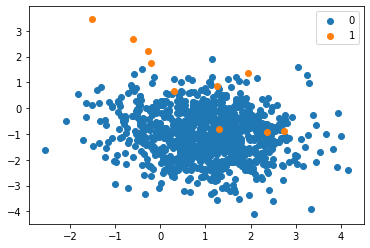

In [6]:
counter = co.Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section3"></a>
# <font color="#004D7F"> 3. Evaluación de Modelos desbalanceados</font>

El Accuracy es la métrica más común para las tareas de clasificación, aunque es inapropiada para este tipo de problemas. Por ejemplo, si el 98% de los datos pertenecen a la clase negativa, puede lograr un Accuracy del 98% en promedio simplemente prediciendo la clase negativa todo el tiempo, logrando una puntuación que ingenuamente se ve bien, pero en la práctica no tiene habilidad.

Las alternativas populares son las puntuaciones de **Precision** y **Recall** que permiten considerar el desempeño del modelo centrándose en la clase minoritaria, denominada clase positiva.

**[`Precision`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)** calcula la relación entre el número de ejemplos positivos predichos correctamente dividido por el número total de ejemplos positivos que fueron predichos. Maximizar esta métrica minimizará los falsos positivos.

* Precision = Verdaderos Positivos / (Verdaderos Positivos + Falsos Positivos)

**[`Recall`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)** predice la proporción del número total de ejemplos positivos predichos correctamente dividido por el número total de ejemplos positivos que podrían haberse predicho. Maximizar el recuerdo minimizará los falsos negativos.

* Recall = Verdaderos Positivos / (Verdaderos Positivos + Falsos Negativos)

**[`F-Measure`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)** resume en una única puntuación que promedia tanto Precision como Recall. Maximizar la F-Measure maximizará tanto Precision como Recall.

* F-Measure = (2 * Precision * Recall) / (Precision + Recall)

El ejemplo a continuación se ajusta a un modelo de regresión logística en un problema de clasificación desequilibrada y calcula las diferentes métricas

In [9]:
# Modelado
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, stratify=y)
model = LogisticRegression(solver='liblinear')
model.fit(trainX, trainy)
yhat = model.predict(testX)
# Metricas
print('Accuracy: %.3f' % accuracy_score(testy, yhat))
print('Precision: %.3f' % precision_score(testy, yhat))
print('Recall: %.3f' % recall_score(testy, yhat))
print('F-measure: %.3f' % f1_score(testy, yhat))

Accuracy: 0.994
Precision: 1.000
Recall: 0.400
F-measure: 0.571


<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section4"></a>
# <font color="#004D7F"> 4. Submuestreo de la clase mayoritaria</font>

Un enfoque rápido y confiable es eliminar ejemplos aleatoriamente de la clase mayoritaria para reducir el desbalance a una proporción que sea menos severa o incluso que las clases sean uniformes.

El siguiente ejemplo crea una clasificación de datos desbalanceados, luego usa la clase [`RandomUnderSampler`](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.under_sampling.RandomUnderSampler.html) para cambiar la distribución de clases de **1:100 a 1:2**, eliminando ejemplos de la clase mayoritaria.

In [13]:
print(co.Counter(y))
# Estrategia de submuestreo
undersample = RandomUnderSampler(sampling_strategy=0.5)
# Ajustar y aplicar la transformación
X_under, y_under = undersample.fit_resample(X, y)
# Resultados
print(co.Counter(y_under))

Counter({0: 990, 1: 10})
Counter({0: 20, 1: 10})


<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section5"></a>
# <font color="#004D7F"> 5. Sobremuestreo de la clase minoritaria</font>

Una alternativa a eliminar ejemplos de la clase mayoritaria es agregar nuevos ejemplos de la clase minoritaria.

Esto se puede lograr simplemente duplicando ejemplos en la clase minoritaria, pero estos ejemplos no agregan ninguna información nueva. En cambio, se pueden sintetizar nuevos ejemplos de la minoría utilizando ejemplos existentes en el conjunto de datos de entrenamiento. Estos nuevos ejemplos estarán "proximos" de los ejemplos existentes en el espacio de características, pero diferentes en formas pequeñas pero aleatorias.

El algoritmo [`SMOTE`](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html) es un método popular para sobremuestrear la clase minoritaria. Esta técnica se puede utilizar para reducir el desequilibrio o para equilibrar la distribución de clases.

La distribución de clases inicial es 1:100 pasando a 1:2 aumentando la clase minoritaria.

In [18]:
print(co.Counter(y))
# Estrategia de submuestreo
oversample = SMOTE(sampling_strategy=0.5)
# Ajustar y aplicar la transformación
X_over, y_over = oversample.fit_resample(X, y)
# Resultados
print(co.Counter(y_over))

Counter({0: 990, 1: 10})
Counter({0: 990, 1: 495})


<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section6"></a>
# <font color="#004D7F"> 6. Combinación de Sobremuestreo y submuestreo</font>

El submuestreo de datos eliminará ejemplos de la clase mayoritaria, mientras que el sobremuestreo de datos agregará ejemplos a la clase minoritaria. Estos dos enfoques se pueden combinar y usar en un solo conjunto de datos de entrenamiento. 

Las combinaciones se pueden aplicar manualmente a un conjunto de datos aplicando primero un algoritmo de muestreo y luego otro. Afortunadamente, la libreria imbalanced-learn proporciona implementaciones de técnicas comunes de muestreo de datos combinados.

El siguiente ejemplo demuestra cómo usar [`SMOTEENN`](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.combine.SMOTEENN.html) que combina el sobremuestreo SMOTE de la clase minoritaria y el submuestreo de vecinos más cercanos editado de la clase mayoritaria.

In [19]:
print(co.Counter(y))
# Estrategia de submuestreo
sample = SMOTEENN(sampling_strategy=0.5)
# Ajustar y aplicar la transformación
X_bal, y_bal = oversample.fit_resample(X, y)
# Resultados
print(co.Counter(y_bal))

Counter({0: 990, 1: 10})
Counter({0: 990, 1: 495})


<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section7"></a>
# <font color="#004D7F"> 7. Algoritmos sensibles a los pesos</font>

La mayoría de los algoritmos asumen que todos los errores de clasificación cometidos por un modelo son iguales. A menudo, este no es el caso de los problemas de clasificación desbalanceada, en los que pasar por alto un caso de clase positiva o minoritaria es peor que clasificar incorrectamente un ejemplo de la clase negativa o mayoritaria.

El aprendizaje sensible a los pesos es un subcampo que tiene en cuenta los pesos de los errores de predicción (y potencialmente otros pesos) al entrenar un modelo. Muchos algoritmos se pueden actualizar para que sean sensibles a los pesos, donde el modelo se penaliza por errores de clasificación errónea de una clase más que de otra, como la clase minoritaria.

La librería scikit-learn proporciona esta capacidad para una variedad de algoritmos a través del atributo `class_weight` especificado al definir el modelo. Se puede especificar una ponderación que sea inversamente proporcional a la distribución de clases.

Si la distribución de clases fue de 0,99 a 0,01 para las clases mayoritarias y minoritarias, entonces el argumento `class_weight` podría definirse como un diccionario que define una penalización de 0,01 por errores cometidos para la clase mayoritaria y una penalización de 0,99 por errores cometidos con la clase minoritaria, por ejemplo, $\texttt{{0: 0.01, 1: 0.99}}$.

Esta es una heurística útil y se puede configurar automáticamente estableciendo el argumento `class_weight = balanced`.

In [20]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, stratify=y)
# define model
model = LogisticRegression(solver='liblinear', class_weight='balanced')
# fit model
model.fit(trainX, trainy)
# predict on test set
yhat = model.predict(testX)
# evaluate predictions
print('F-Measure: %.3f' % f1_score(testy, yhat))

F-Measure: 0.077


<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section8"></a>
# <font color="#004D7F"> 8. Conclusiones</font>

En este ejercicio hemos visto como poder corregir dataset con la clase desbalanceada aunque no hemos visto el resultado que nos proporciona el modelo con estos datasets.

Calcule el resultado de estos dataset corrigiendo la clase desbalanceada y compárelo con el resultado del punto 7

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>